### En base a nuestros Datos y al interes de la empresa, queremos observar como se relaciona la cantidad vendida con la utilidad o ganancia real que tendremos, ya que esta puede verse afectada por diversos motivos, como la variacion del tipo de cambio, costos de envíos, inflación entre otros.
### Vamos a proponer un modelo de regresión linear simple para ver si este modelo puede explicar la variacion de la utilidad bruta con respecto a la cantidad vendida

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

In [2]:
# importamos los datos

df = pd.read_csv("datosLimpios.csv")
df.head()

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,155040.02,15562,41.19,63864.63,91175.39
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,144314.49,1534,57.57,83084.42,61230.07
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,114380.59,4036,57.42,65680.44,48700.15
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,144097.85,991,27.39,39475.34,104622.51
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,110570.62,4679,68.42,75654.42,34916.20


In [4]:
df['UTILIDAD'] = df['utilidad_bruta'] - df['costos']
df.head()

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos,UTILIDAD
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,155040.02,15562,41.19,63864.63,91175.39,-27310.76
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,144314.49,1534,57.57,83084.42,61230.07,21854.35
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,114380.59,4036,57.42,65680.44,48700.15,16980.29
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,144097.85,991,27.39,39475.34,104622.51,-65147.17
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,110570.62,4679,68.42,75654.42,34916.20,40738.22


In [5]:
# Ahora filtramos el dataset con los datos que vamos a analizar
datos = df[['cantidad','UTILIDAD']]
datos.head()

,cantidad,UTILIDAD
0,15562,-27310.76
1,1534,21854.35
2,4036,16980.29
3,991,-65147.17
4,4679,40738.22


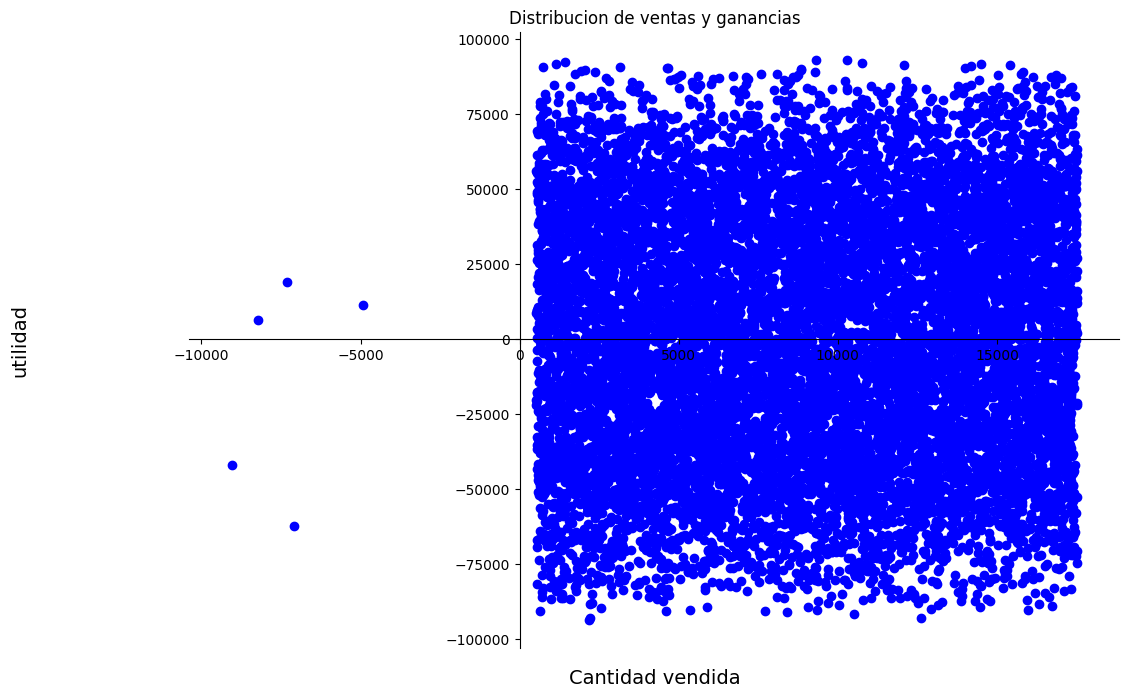

In [28]:
#Presentamos los datos con un diagrama de dispersion para poder ver si vemos alguna relación
#Nota lo hacemos con Axes para ajustar los ejes.
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(datos['cantidad'], datos['UTILIDAD'], color ='blue')
ax.spines['left'].set_position(('data',0)) #muevo el eje y al centro
ax.spines['bottom'].set_position(('data',0)) #muevo el eje x al centro
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Cantidad vendida', fontsize = 14, labelpad = 220)
ax.set_ylabel('utilidad',fontsize = 14, labelpad = 300)
ax.set_title('Distribucion de ventas y ganancias')
plt.show()

#### Al tener una gran cantidad de datos vemos una dispersion muy homogenea, en principio parecería que no estamos en presencia de una relación lineal pero vamos a insistir con el modelo de regresión para analizar los resultados.

### Para nuestro modelo el predictor será: <table><tr><td>cantidad</td></tr></table> 
### y la variable de respuesta: <table><tr><td>utilidad</td></tr></table>

In [12]:
# dividimos los datos en train y test
X = datos[['cantidad']]
y = datos['UTILIDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

#creación del modelo:
modelo = LinearRegression()
#entrenamos el modelo:
modelo.fit(X = x_train, y = y_train)

LinearRegression()

### Explicacion:
#### Dividimos los datos en "X = datos[['cantidad']]" aca seleccionamos la columna datos y al estar dentro del corchete se crea un DataFrame con una sola columna con la variable independiente.
#### y = datos['UTILIDAD'] selecciona la columna 'UTILIDAD' como la variable dependiente o 'Target'
#### train_test_split() divide los datos en dos partes; un conjunto de entrenamiento (X_train, y_train) y un conjunto de prueba (X_test, y_test )
#### train_size = 0.8 quiere decir q el 80% de los datos se utilizan para entrenar el modelo y el 20% restante para probarlo.
#### random_state = 123 crea una semilla para generar numeros aleatorios que aseguran q la division sea reproducible. si se cambia o no se indica, la division podria ser diferente en cada ejecución.
#### shuffle = True Nos dice que los datos se mezclaran antes de la división que es útil para evitar algun patron no deseado en los datos.


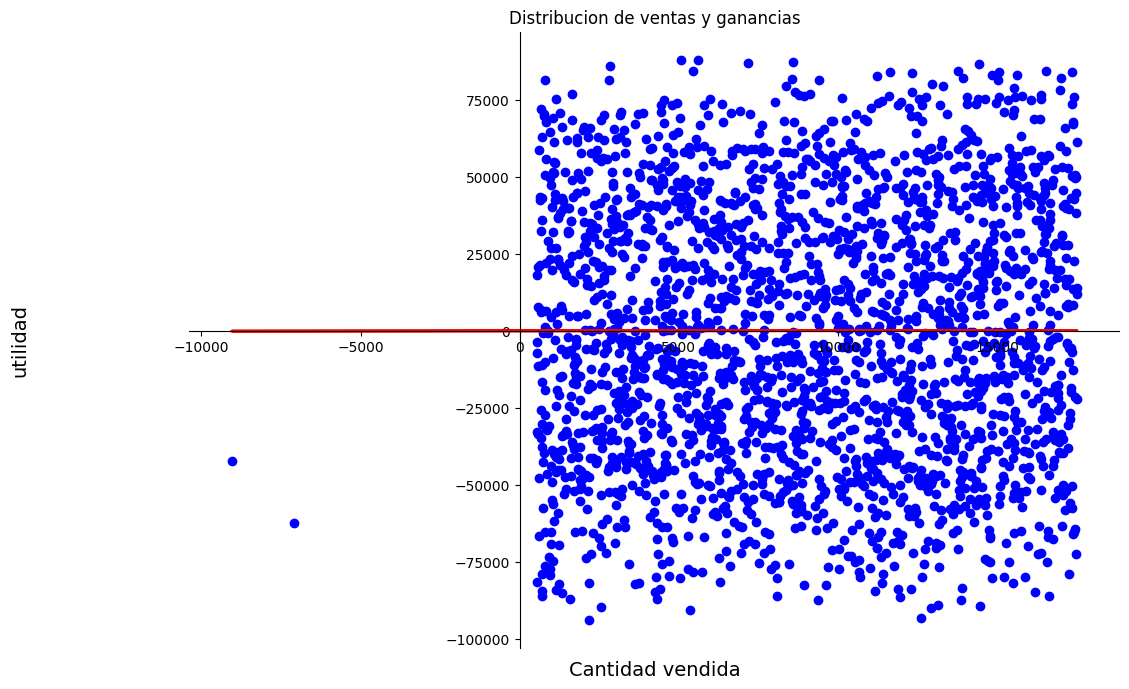

In [30]:
# Realizamos predicciones y graficamos
y_predecida = modelo.predict(X_test)

# graficamos

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test, color ='blue', label='Datos Reales')
ax.plot(X_test, y_predecida, color = 'red', linewidth = 2, label = 'Predicciones')
ax.spines['left'].set_position(('data',0)) #muevo el eje y al centro
ax.spines['bottom'].set_position(('data',0)) #muevo el eje x al centro
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Cantidad vendida', fontsize = 14, labelpad = 220)
ax.set_ylabel('utilidad',fontsize = 14, labelpad = 300)
ax.set_title('Distribucion de ventas y ganancias')
plt.show()




### Claramente estos datos no se ajustan por un modelo de regresión lineal, pero vamos a seguir evaluando el modelo para ver si el SRME, MAE Y R2 nos asevera esto.

In [33]:
# Información del modelo
#==============================================================
print(f"Intercepto B0: {modelo.intercept_}")
print(f"Coeficiente B1-pendiente-:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de Determinación R^2:", modelo.score(X,y))

Intercepto B0: -50.96379457845275
Coeficiente B1-pendiente-: [('cantidad', 0.007483802850423719)]
Coeficiente de Determinación R^2: -3.4935526148194285e-05


### Vemos que el intercepto es -50 y la pendiente practicamente nula, 0.007 a su vez, el coeficiente de determinación nos dice que la proporcion de variacion de y que se explica por la relación lineal entre x e y (por el modelo) es de 0,000034935.. es decir El modelo de regresión lineal no explica la variación de estos datos.

### Veamos ahora que nos dice el error cuadratico medio y el error medio absoluto

In [36]:
mse = mean_squared_error(y_test, y_predecida)
mae = mean_absolute_error(y_test, y_predecida)
print(f"Error cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático Medio (MSE): 1739023959.2473333
Error Absoluto Medio (MAE): 35490.37132390285


### El error es enorme justamente porque el modelo no se ajusta a los datos.

### Solo para comparar usaremos  Statsmodels ya que un poco mas completa que Scikitlearn y podemos ver la bondad de ajuste, y otros estadísticos.

In [37]:
# dividimos los datos en train y test
X = datos[['cantidad']]
y = datos['UTILIDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

In [38]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               UTILIDAD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.007511
Date:                Sat, 28 Sep 2024   Prob (F-statistic):              0.931
Time:                        21:54:17   Log-Likelihood:            -1.1508e+05
No. Observations:                9550   AIC:                         2.302e+05
Df Residuals:                    9548   BIC:                         2.302e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.9638    885.438     -0.058      0.9

### En este caso el coeficiente de determinacion es 0 con eso ya sabemos que el modelo no explica la variabilidad de la variable respuesta. El F-static sería el valor del estadistico que calculamos para ver si rechazo o no la hipotesis nula en el caso de la regresión. Vemos que la significación del valor F es de 0.931. si nuestra región crítica o nivel de significancia α =0.05 vemos el valor de significancia de F es mas grande por lo tanto deberiamos aceptar la H0 y decir que el modelo no ajusta.
### es decir: Ho: β1 =0 --> la aceptamos 
###                 H1: β1 ≠0

### A pesar de ya sabemos que este modelo no explica nuestras variables, la ecuación del modelo de regresion lineal quedaría:
### UTILIDAD = -50.96 + 0.0075*CANTIDAD

### Veamos ahora la Correlación

### Vamos a realizar una matriz de correlación entre los datos de nuestro dataframe

In [39]:
dataCorr = df.iloc[:, 8:]
dataCorr

,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos,UTILIDAD
0,155040.02,15562,41.19,63864.63,91175.39,-27310.76
1,144314.49,1534,57.57,83084.42,61230.07,21854.35
2,114380.59,4036,57.42,65680.44,48700.15,16980.29
3,144097.85,991,27.39,39475.34,104622.51,-65147.17
4,110570.62,4679,68.42,75654.42,34916.20,40738.22
...,...,...,...,...,...,...
11933,173752.28,7249,57.33,99610.76,74141.52,25469.24
11934,101345.37,13210,54.99,55727.08,45618.29,10108.79
11935,101967.41,10356,61.16,62365.65,39601.76,22763.89
11936,105556.48,9532,43.85,46283.85,59272.63,-12988.78


In [40]:
matriz = dataCorr.corr()
print(matriz)

                    ventas  cantidad  utilidad_bruta_p  utilidad_bruta  \
ventas            1.000000 -0.010105          0.002890        0.546763   
cantidad         -0.010105  1.000000          0.006132        0.000516   
utilidad_bruta_p  0.002890  0.006132          1.000000        0.820883   
utilidad_bruta    0.546763  0.000516          0.820883        1.000000   
costos            0.545998 -0.011917         -0.818105       -0.395932   
UTILIDAD          0.000332  0.007442          0.980909        0.835374   

                    costos  UTILIDAD  
ventas            0.545998  0.000332  
cantidad         -0.011917  0.007442  
utilidad_bruta_p -0.818105  0.980909  
utilidad_bruta   -0.395932  0.835374  
costos            1.000000 -0.835513  
UTILIDAD         -0.835513  1.000000  


### teniendo en cuenta que el coeficiente de correlación varía entre:  -1<r<1 podemos ver como se relacionan las distintas variables, obviamente entre la misma variable la correlación será de 1.
### EN ESTE CASO LOS DATOS SON MAYORMENTE DE LA UTILIDAD EXPRESADA EN DIFERENTES FORMAS POR ESO EN ALGUNOS CASOS ESTAN FUERTEMENTE RELACIONADOS, TAL VEZ PODRÍAMOS HABER ELEGIDO QUE RELACIÓN HAY ENTRE COSTOS Y UTILIDAD Y HUBIERAMOS TENIDO QUIZÁ UN MODELO DE REGRESIÓN QUE SE AJUSTARA MEJOR A LOS DATOS

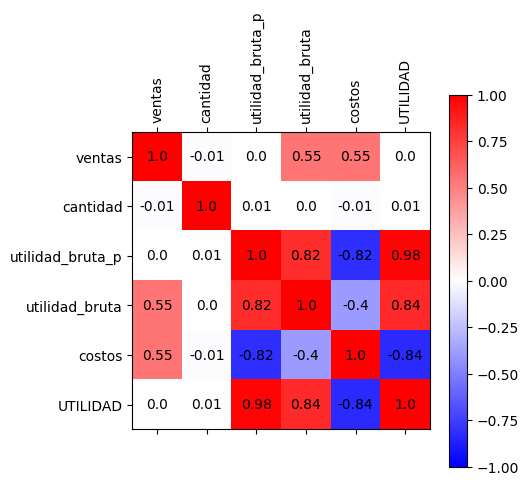

In [42]:
# grafico de la matriz de correlación

plt.matshow(matriz, cmap = "bwr", vmin = -1, vmax = 1)

plt.xticks(range(6), dataCorr.columns, rotation = 90)
plt.yticks(range(6), dataCorr.columns)

for i in range (len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i,j],2), ha = "center", va = "center")

plt.colorbar()
plt.show()

### Vemos que la utilidad y costos estan fuertamente relacionados en manera negativa es decir cuando aumentan los costos disminuye la utilidad. tal vez deberíamos haber hecho un analisis de regresion lineal sobre estas variables. Aunque esto no quiere decir que tengan una relación lineal.

### CONCLUSIONES
#### En nuestro caso y con las Variables elegidas. Claramente estos datos no se ajustan por un modelo de regresión lineal. Vimos que el intercepto es -50 y la pendiente practicamente nula, 0.007 a su vez, el coeficiente de determinación, nos dice que la proporción de variacion de y que se explica por la relación lineal entre x e y (por el modelo) es de 0,000034935.. es decir El modelo de regresión lineal no explica la variación de estos datos. A su vez Error cuadrático Medio (MSE): 1739023959.2473333 y el Error Absoluto Medio (MAE): 35490.37132390285 "SON MUY GRANDES" Y para concluir vemos los datos que nos arroja Statsmodels en los cuales tenemos las prubas de hipotesis en donde, El F-static sería el valor del estadistico que calculamos para ver si rechazo o no la hipotesis nula en el caso de la regresión. Vemos que la significación del valor F es de 0.931. si nuestra región crítica o nivel de significancia α =0.05 vemos el valor de significancia de F es mas grande por lo tanto deberiamos aceptar la H0 y decir que el modelo no ajusta.¶